In [1]:
# Import Dependencies
import os
import requests 
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from sklearn.model_selection import train_test_split
import seaborn as sns

# File to load
spotify_df = pd.read_csv("Resources/Data Set under 100mb.csv") 

spotify_df

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,0,['Uli'],2/22/1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],6/1/1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],3/21/1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],3/21/1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,['阿YueYue'],9/26/2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,blind,72,153293,0,['ROLE MODEL'],10/21/2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,What They'll Say About Us,70,187601,0,['FINNEAS'],9/2/2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",3/5/2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [2]:
# Spotify api claims any value above .66 is favored to be a podcast / book 
# We will use any value below .66 as our classification of a song 

music_df = spotify_df.drop(spotify_df[(spotify_df['speechiness'] >= .66)].index)
music_df

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,0,['Uli'],2/22/1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],3/21/1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],3/21/1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,Ave Maria,0,178933,0,['Dick Haymes'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,['阿YueYue'],9/26/2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,blind,72,153293,0,['ROLE MODEL'],10/21/2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,What They'll Say About Us,70,187601,0,['FINNEAS'],9/2/2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",3/5/2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [3]:
# create a clean year column for the data 
music_df["release_date"] = pd.to_datetime(music_df["release_date"])
year = music_df["release_date"].dt.year
year.head()

0    1922
2    1922
3    1922
4    1922
5    1922
Name: release_date, dtype: int64

In [4]:
music_df = pd.DataFrame({"name" : music_df["name"],
                         "artist" : music_df["artists"],
                         "popularity": music_df["popularity"],
                         "year" : year,
                         "danceability":music_df["danceability"],
                         "energy": music_df["energy"],
                         "loudness": music_df["loudness"],
                         "tempo": music_df["tempo"],
                         "valence": music_df["valence"],
                         "speechiness": music_df["speechiness"],
                         "acousticness": music_df["acousticness"],
                         "instrumentalness": music_df["instrumentalness"],
                        })

music_df = music_df.dropna()

 The correlation between danceability and popularity is 0.2


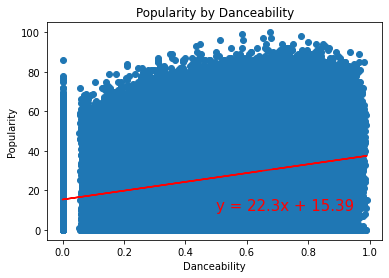

In [5]:
x1 = music_df['danceability']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between danceability and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.5,10), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Popularity by Danceability')
plt.show()

 The correlation between energy and popularity is 0.29


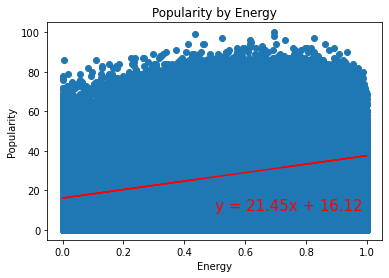

In [6]:
x1 = music_df['energy']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between energy and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.5,10), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Popularity by Energy')
plt.show()

 The correlation between loudness and popularity is 0.31


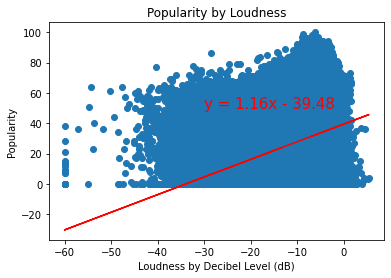

In [7]:
x1 = music_df['loudness']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between loudness and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x - " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(-30,50), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Loudness by Decibel Level (dB)')
plt.ylabel('Popularity')
plt.title('Popularity by Loudness')
plt.show()

 The correlation between tempo and popularity is 0.07


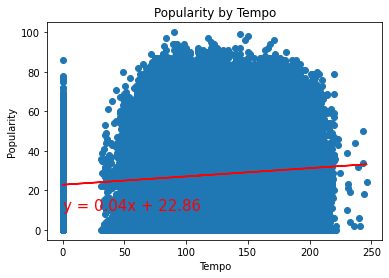

In [8]:
x1 = music_df['tempo']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between tempo and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.5,10), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.title('Popularity by Tempo')
plt.show()

 The correlation between valence and popularity is 0.0


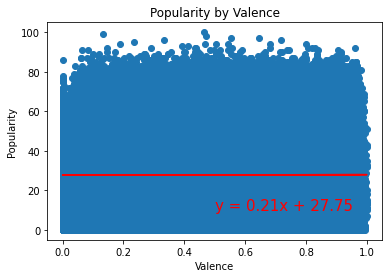

In [9]:
x1 = music_df['valence']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between valence and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.5,10), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Popularity by Valence')
plt.show()

 The correlation between speechiness and popularity is 0.06


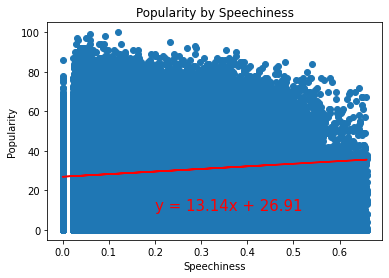

In [10]:
x1 = music_df['speechiness']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between speechiness and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.2,10), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.title('Popularity by Speechiness')
plt.show()

 The correlation between acousticness and popularity is -0.37


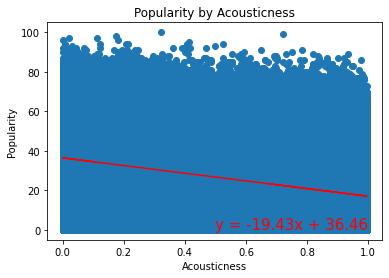

In [11]:
x1 = music_df['acousticness']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between acousticness and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.5,.5), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.title('Popularity by Acousticness')
plt.show()

 The correlation between instrumentalness and popularity is -0.25


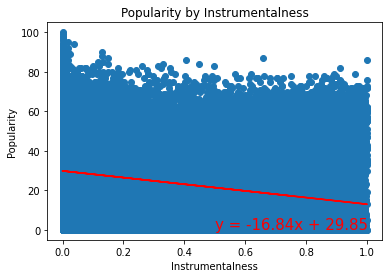

In [12]:
x1 = music_df['instrumentalness']
y1 = music_df['popularity']

# Calculate correlation coefficient 

corCof = st.pearsonr(x1, y1)
print(f" The correlation between instrumentalness and popularity is {round(corCof[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(.5,.5), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Popularity by Instrumentalness')
plt.show()

In [13]:
# Create a new artist DataFrame  

artists_df = pd.DataFrame({"artist": music_df["artist"], 
                           "popularity": music_df["popularity"], 
                           "year": year}) 
artists_df.head()

,artist,popularity,year
0,['Uli'],6.0,1922
2,['Ignacio Corsini'],0.0,1922
3,['Ignacio Corsini'],0.0,1922
4,['Dick Haymes'],0.0,1922
5,['Dick Haymes'],0.0,1922


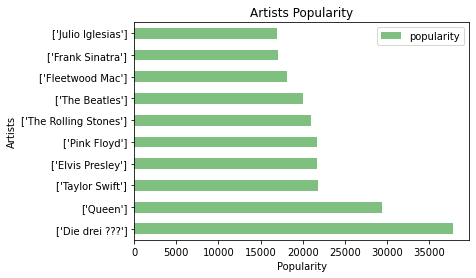

In [14]:
# Top 10 artists based on popularity value 
Top10_artists = artists_df.groupby(['artist'])[['popularity']].sum().sort_values(by=['popularity'], ascending=False).head(10) 
Top10_artists.plot.barh(color='green', alpha =0.5) 
plt.title('Artists Popularity') 
plt.xlabel('Popularity') 
plt.ylabel('Artists') 
plt.show()

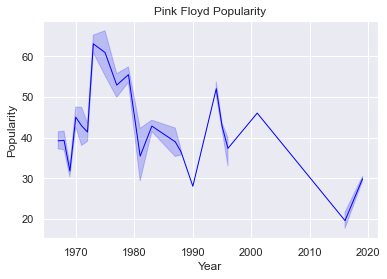

In [15]:
# The popularity of Pink Floyd songs over the year 
pf = artists_df[artists_df['artist'] == "['Pink Floyd']"] 
sns.set(style='darkgrid') 
sns.lineplot(x='year', y='popularity',lw = 1, data=pf, color='blue') 
plt.title("Pink Floyd Popularity") 
plt.xlabel('Year') 
plt.ylabel('Popularity') 
plt.show()

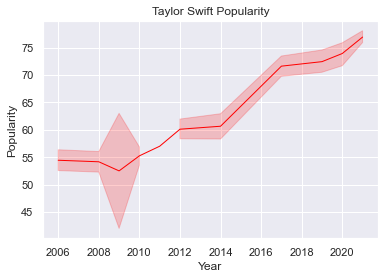

In [16]:
# The popularity of Taylor Swift songs over the year 
ts = artists_df[artists_df['artist'] == "['Taylor Swift']"] 
sns.set(style='darkgrid') 
sns.lineplot(x='year', y='popularity',lw = 1, data=ts, color='red') 
plt.title("Taylor Swift Popularity") 
plt.xlabel('Year') 
plt.ylabel('Popularity') 
plt.show()

In [17]:
# sort the df by decade to compare the changes in the identifying index
years = [2020, 2021]
music_df.year.isin(years)
year_2020= music_df[music_df.year.isin(years)]
year_2020

,name,artist,popularity,year,danceability,energy,loudness,tempo,valence,speechiness,acousticness,instrumentalness
39511,A Lover's Concerto,['The Toys'],41,2020,0.671,0.867,-2.706,120.689,0.8390,0.0571,0.436,0.000000
39581,"The Circle Game - Live at The 2nd Fret, Philad...",['Joni Mitchell'],18,2020,0.644,0.212,-14.118,117.072,0.4410,0.0347,0.881,0.000022
39583,"Urge For Going - Live at The 2nd Fret, Philade...",['Joni Mitchell'],18,2020,0.627,0.184,-15.533,115.864,0.2990,0.0450,0.955,0.000162
39585,"Brandy Eyes - Live at The 2nd Fret, Philadelph...",['Joni Mitchell'],17,2020,0.442,0.399,-12.661,121.662,0.5540,0.0780,0.930,0.000499
39587,What's The Story Mr. Blue - Live at The 2nd Fr...,['Joni Mitchell'],17,2020,0.581,0.331,-14.087,88.303,0.6420,0.2430,0.888,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...
586666,Skyscraper,['Emilie Chin'],4,2020,0.626,0.530,-13.117,120.113,0.2150,0.0284,0.113,0.856000
586667,云与海,['阿YueYue'],50,2020,0.560,0.518,-7.471,131.896,0.2110,0.0292,0.785,0.000000
586668,blind,['ROLE MODEL'],72,2020,0.765,0.663,-5.223,150.091,0.6860,0.0652,0.141,0.000297
586669,What They'll Say About Us,['FINNEAS'],70,2020,0.535,0.314,-12.823,145.095,0.0663,0.0408,0.895,0.000150


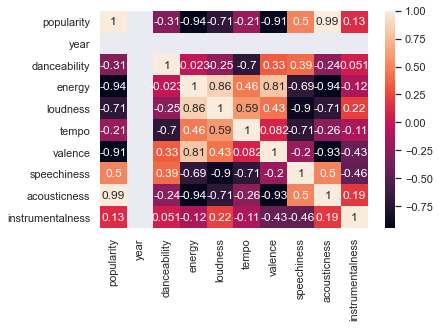

In [18]:
# check for correlation among each index attribute
compat_df = year_2020.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [19]:
# in 2020, the highest ranking index pairings is loudness & energy (86%) followed by valence & energy (81%)

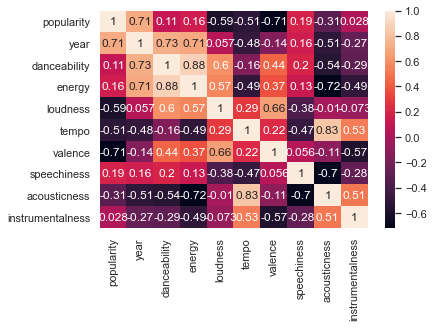

In [20]:
# we repeat this for each decade to see if there is a change in the top ranking index pairings
# 2010-2019
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
music_df.year.isin(years)
year_2010= music_df[music_df.year.isin(years)]
year_2010

compat_df = year_2010.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [21]:
# In the 2010's the highest ranking index pairings were energy & dancebility (88%) and acousticness & tempo (83%)

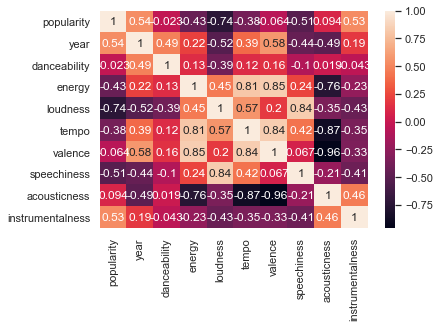

In [22]:
#2000-2009
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
music_df.year.isin(years)
year_2000= music_df[music_df.year.isin(years)]
year_2000

compat_df = year_2000.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [23]:
# In the 2000's the highest ranking index pairings were energy & valence (85%), valence & tempo (84%) and speechiness & loudness (84%)

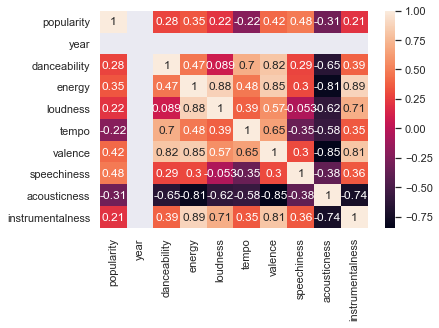

In [24]:
#1990-1999
years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
music_df.year.isin(years)
year_1990= music_df[music_df.year.isin(years)]
year_1990

compat_df = year_1990.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [25]:
# In the 1990's the highest ranking index pairings were energy & instrumentalness (89%), loudness & energy (88%) and valence & energy (85%)

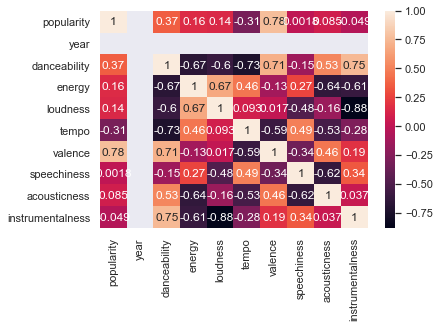

In [26]:
#1980-1989
years = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]
music_df.year.isin(years)
year_1980= music_df[music_df.year.isin(years)]
year_1980

compat_df = year_1980.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [27]:
# In the 1980s the highest ranking index pairings were danceability & instrumentalness (75%) and valence & dancebility (71%)

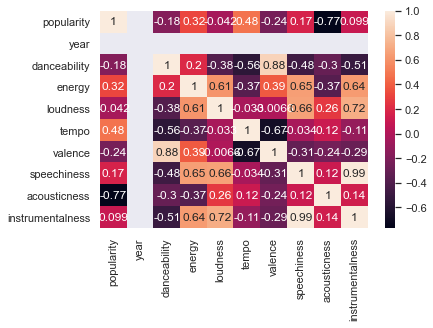

In [28]:
#1970-1979
years = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
music_df.year.isin(years)
year_1970= music_df[music_df.year.isin(years)]
year_1970

compat_df = year_1970.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [29]:
# In the 1970's the highest ranking index pairings were valence & danceability (88%) and loudness & instrumentalness (72%). We rule out the pairing of speechiness & instrumentalness (99%) because these pairings together indicate that the track is liekly to be an audiobook or podcast.

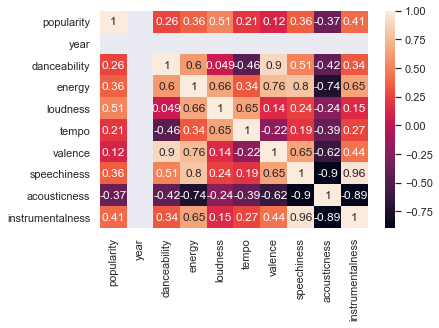

In [30]:
#1960-1969
years = [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969]
music_df.year.isin(years)
year_1960= music_df[music_df.year.isin(years)]
year_1960

compat_df = year_1960.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [31]:
# In the 1960's the highest ranking index pairings were valence & danceability (90%) and speechiness & energy (80%). Again We rule out the pairing of speechiness & instrumentalness (96%) because these pairings together indicate that the track is liekly to be an audiobook or podcast.

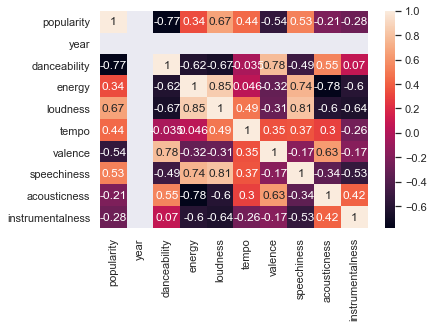

In [32]:
#1950- 1959
years = [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959]
music_df.year.isin(years)
year_1950= music_df[music_df.year.isin(years)]
year_1950

compat_df = year_1950.iloc[5:12]
correlation_mat = compat_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [33]:
# In the 1950's the highest ranking index pairings were speechiness & loudness (81%) and valence and danceability (78%)